In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [82]:
val = pd.read_csv("C:\\Users\joy01\Downloads\Vall.csv",encoding= 'unicode_escape')
data2 = pd.read_csv("C:\\Users\joy01\Downloads\Static4.csv",encoding= 'unicode_escape')

In [83]:
data2.describe()
data2.isnull().sum().sort_values(ascending=False)/data2.shape[0]

DAS        0.491471
FOS        0.294243
ODH        0.256930
Density    0.154584
CO         0.041578
FA         0.020256
dtype: float64

In [84]:
data2.head()

,Density,CO,FA,ODH,DAS,FOS
0,1800,10.0,20.0,60.0,38.0,1.64
1,1800,20.0,20.0,60.0,38.0,1.65
2,1800,30.0,20.0,60.0,38.0,1.69
3,1800,10.0,25.0,60.0,38.0,1.65
4,1800,20.0,25.0,60.0,38.0,1.69


In [85]:
len(data2)

938

In [86]:
data2['Density'][:938]

0      1800
1      1800
2      1800
3      1800
4      1800
       ... 
933    2243
934     NaN
935     NaN
936     NaN
937        
Name: Density, Length: 938, dtype: object

In [87]:
data2['Density'] = pd.to_numeric(data2['Density'],errors = 'coerce')
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  792 non-null    float64
 1   CO       899 non-null    float64
 2   FA       919 non-null    float64
 3   ODH      697 non-null    float64
 4   DAS      477 non-null    float64
 5   FOS      662 non-null    float64
dtypes: float64(6)
memory usage: 44.1 KB
None


In [88]:
data2['Density'] =data2['Density'].replace(np.NaN, data2['Density'].mean())
print(data2['Density'])

0      1800.000000
1      1800.000000
2      1800.000000
3      1800.000000
4      1800.000000
          ...     
933    2243.000000
934    1760.529457
935    1760.529457
936    1760.529457
937    1760.529457
Name: Density, Length: 938, dtype: float64


In [89]:
data2['CO'] =data2['CO'].replace(np.NaN, data2['CO'].mean())

In [90]:
data2['FA'] =data2['FA'].replace(np.NaN, data2['FA'].mean())

In [91]:
data2['ODH'] =data2['ODH'].replace(np.NaN, data2['ODH'].mean())

In [92]:
data2['DAS'] =data2['DAS'].replace(np.NaN, data2['DAS'].mean())

In [93]:
data2['FOS'] =data2['FOS'].replace(np.NaN, data2['FOS'].mean())

In [94]:
data2.iloc[0:,:6].head(10)

,Density,CO,FA,ODH,DAS,FOS
0,1800.0,10.0,20.0,60.0,38.0,1.64
1,1800.0,20.0,20.0,60.0,38.0,1.65
2,1800.0,30.0,20.0,60.0,38.0,1.69
3,1800.0,10.0,25.0,60.0,38.0,1.65
4,1800.0,20.0,25.0,60.0,38.0,1.69
5,1800.0,30.0,25.0,60.0,38.0,1.69
6,1800.0,10.0,29.0,60.0,38.0,1.69
7,1800.0,20.0,29.0,60.0,38.0,1.69
8,1800.0,30.0,29.0,60.0,38.0,1.69
9,1800.0,10.0,20.0,90.0,38.0,1.56


In [95]:
data2.drop(data2.iloc[:, 6:], inplace=True, axis=1)

In [96]:
data2.shape

(938, 6)

In [97]:
data2.isnull().sum()

Density    0
CO         0
FA         0
ODH        0
DAS        0
FOS        0
dtype: int64

In [98]:
import numpy as np

labels = np.array(data2['FOS'])
data2= data2.drop('FOS', axis = 1)
val= val.drop('FOS', axis=1)
feature_list = list(data2.columns)
data2 = np.array(data2)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels, test_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(703, 5) (703,)
(235, 5) (235,)


# Neural Network(impt)

In [56]:
from sklearn.neural_network import MLPRegressor
nn= MLPRegressor(random_state=5,  max_iter=84)

sc=MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

C:\Users\joy01\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (84) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
nn.predict(val)

C:\Users\joy01\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


array([0.80087363, 1.23912805, 1.95770733])

In [78]:
acc=  nn.score(X_test, y_test)
print(acc)

-0.38877680884918187


In [59]:
mae_nn = mean_absolute_error(y_test, y_pred)
mse_nn = mean_squared_error(y_test, y_pred)
r2_nn = r2_score(y_test, y_pred)
rmse_nn = sqrt(mean_squared_error(y_test, y_pred))

print('Mean Squared Error:',mse_nn)
print('Mean Absolute Error:', mae_nn)  
print('R2 Score:', r2_nn)  
print('Root mean square error:',  rmse_nn)

Mean Squared Error: 1.864273602935251
Mean Absolute Error: 0.8675461597647439
R2 Score: -0.38877680884918187
Root mean square error: 1.3653840496121414


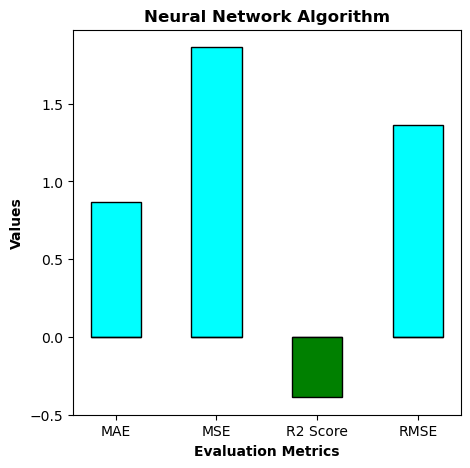

In [61]:
import matplotlib.pyplot as plt
 

data ={'MAE':mae_nn, 'MSE':mse_nn, 'R2 Score': 0, 'RMSE': rmse_nn}
data1 ={'MAE':0, 'MSE':0, 'R2 Score': r2_nn, 'RMSE':0}
key_nn = list(data.keys())
val_nn = list(data.values())
key_nn1 = list(data1.keys())
val_nn1 = list(data1.values())

fig = plt.figure(figsize = (5, 5))

ax = plt.subplot(111)
ax.bar(key_nn, val_nn, width=0.5,edgecolor = "black", color ='cyan')
ax.bar(key_nn1,val_nn1,width=0.5, edgecolor="black", color ='green')

plt.xlabel("Evaluation Metrics",fontweight="bold" )
plt.ylabel("Values", fontweight="bold")
plt.title("Neural Network Algorithm", fontweight="bold")
plt.show()